# 4.1 로지스틱 회귀
- 로지스틱 회귀, 다중분류, 시그모이드 함수, 소프트맥스 함수

## 럭키백의 확률
- 럭키백에 들어가는 생선은 7 종류, 생선의 크기, 무게 등이 주어질 때 각 생선에 대한 확률을 계산해야 함
- k-nearest neighbor 분류기는 이웃들의 클래스 비율($n_i/N$)을 바탕으로 클래스 확률을 계산


### 데이터 준비하기

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


pandas는 csv 파일 첫줄을 열 제목으로 자동인식

- pd.unique(*df[col]*) : 해당 column의 고유값들을 추출(중복되지 않는 순수한 value)

In [ ]:
print(pd.unique(fish['Species']))
Weight =  pd.unique(fish['Weight'])
Weight.sort()
print(Weight)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[   0.     5.9    6.7    7.     7.5    8.7    9.7    9.8    9.9   10.
   12.2   13.4   19.7   19.9   32.    40.    51.5   55.    60.    69.
   70.    78.    80.    85.    87.    90.   100.   110.   115.   120.
  125.   130.   135.   140.   145.   150.   160.   161.   169.   170.
  180.   188.   197.   200.   218.   225.   242.   250.   260.   265.
  270.   272.   273.   290.   300.   306.   320.   340.   345.   363.
  390.   430.   450.   456.   475.   500.   510.   514.   540.   556.
  567.   575.   600.   610.   620.   650.   680.   685.   690.   700.
  714.   720.   725.   770.   800.   820.   840.   850.   900.   920.
  925.   950.   955.   975.  1000.  1015.  1100.  1250.  1550.  1600.
 1650. ]


**Input vs Target** \
해당 df에서 Species를 target으로 삼고 나머지 5개 col은 input data로 사용, **to_numpy**를 통해 넘파이 배열로 바꾸어 따로 저장

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
## 만약 fish[['Species']].to_numpy()로 대괄호를 2번 중복하면 2차원 배열로 저장됨
print(fish[['Species']].to_numpy()[:5])

[['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


**Train vs Test** \
1. sklearn의 train_test_split을 통해 데이터 세트를 **분할**
2. sklearn의 StandardScaler 클래스를 통해 train, test set을 **표준화 전처리** (train set의 statistics를 기준으로 test set을 변환)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-nearest neighbors classifier 확률 예측
sklearn의 KNeighborsClassifier 클래스 객체를 만들어 train set로 모델 훈련, train set과 test set의 score를 확인

In [ ]:
# k = 3
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target)) 

0.8907563025210085
0.85


**다중분류** : target data에 2개 이상의 클래스가 포함된 문제 vs 이진분류 \
sklearn에서는 문자열로 된 타겟값을 그대로 사용 가능
- kn.classes_
- kn.predict
- kn.predict_proba

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# test set에 있는 처음 5개 샘플의 target값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 각 데이터의 클래스별 확률값 계산
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=2))
# 첫 번째 sample은 2번 class일 확률이 1 \
# 두 번째 sample은 5번 class일 확률이 1 \
# 네 번째 sample은 2번 class일 확률이 0.67, 4번 class일 확률이 0.33 

[[0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]]


kneighbors() method의 입력은 2차원 배열이어야 함, 이를 위해 하나의 샘플만 선택해도 2차원 배열을 반환하는 numpy slicing을 사용

In [ ]:
# 네 번째 sample의 최근접이웃 클래스를 직접 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 최근접이웃 3개 중 2개가 Perch이고 1개가 Roach

[['Roach' 'Perch' 'Perch']]


k-nearest neighbors classifier은 k값이 분모로 들어가는 분수값(1/k, 2/k, ...)만을 예측값으로 내놓으므로 예측확률 측정에 제약이 발생

## Logistic Regression

로지스틱 회귀는 방정식 회귀를 통해 분류하는 모델
$$ ϕ=\frac{1}{(1+e^{-z})} ,\; z = XB^T  $$
B는 coef vector, X는 input vector, ϕ는 z에 대한 sigmoidal 함수


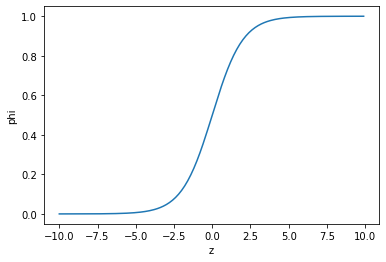

In [ ]:
# sigmoid ftn graph 도해
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10,10,0.1)
phi = 1/(1+np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행
이진 분류의 경우 ϕ(sigmoid ftn value)가 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단

boolean indexing을 이용해 train set에서 Bream와 Smelt의 row vector만을 선택

In [ ]:
# 비교연산자를 통해 Bream과 Smelt만 True, 나머지는 False인 array 생성
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes[:5])
# boolean indexing으로 train set의 input과 output만 추출
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt[:5], target_bream_smelt[:5])

[ True False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]] ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


1. sklearn의 linearmodel 클래스에서 LogisticRegression 메소드 호출
2. fit
3. predict
4. predict_proba
5. score


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
# predcit로 예측결과
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# 확률값 계산결과 반환
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))
# 첫 번째 값은 음성 클래스(bream)일 확률, 두 번째 값은 양성 클래스(smelt)일 확률

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


$$ z = -0.403 × Weight  -0.576 ×Length -0.662 ×Diagonal -1.012×Height -0.731× Width -2.161 $$

In [ ]:
# z값 계산결과 반환 using lr.decision_function()
z_values = lr.decision_function(train_bream_smelt[:5])
print(z_values)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(z_values))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


scipy library를 이용하여 sigmoid 함수인 expit()을 통해 시그모이드 함수 계산을 빠르고 정확하게 할 수 있음\
이때의 값들은 양성 클래스의 확률값

### 로지스틱 회귀로 다중분류 수행하기
- 7개 종류에 대해 분류 작업 실시
- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용, **max_iter** 매개변수에서 반복 횟수를 지정하며 **기본값은 100**이나 반복횟수가 부족하다는 error가 뜨면 반복 횟수를 늘려줘야함
- **L2 규제** : LogisiticRegression은 기본적으로 Ridge 회귀와 같이 계수의 제곱을 규제, 여기서 규제를 제어하는 매개변수는 **C**, C가 작을수록 규제가 강화됨, C의 **기본값은 1**


In [ ]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]),'\n')

print(lr.classes_)
print(np.round(lr.predict_proba(test_scaled[:5]),decimals=3))
# 각 클래스확률 중 가장 큰 값을 갖는 클래스를 예측 클래스로 반환

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch'] 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


다중분류에서는 클래스마다 z값을 하나씩 계산하여 가장 높은 z값을 가지는 클래스가 예측 클래스가 됨\
이때 sigmoidal ftn이 아닌 softmax ftn을 이용하여 확률을 계산, 여러 선형 방정식의 출력값을 0~1 사이로 압축하고 그 값들의 합이 1이 되도록 만듦
$$ e_{sum} =  ∑_{i=1}^{n} e^{z_i} $$
$$ ⇔ 1 = ∑_{i=1}^{n} \frac{e^{z_i}}{e_{sum}}  $$

In [ ]:
# z_1 ~ z_7 값 계산
z_values = lr.decision_function(test_scaled[:5])
print(np.round(z_values, decimals=3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [ ]:
from scipy.special import softmax
proba = softmax(z_values, axis=1)  
# axis=1을 설정해야 개별 sample에 대해 클래스별 확률값을 계산
# 축방향을 설정하지 않으면 배열 전체에 대해 softmax함수를 적용
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 4-2. 확률적 경사 하강법
- 확률적 경사 하강법(stochastic gradient descent; SGD)
- Loss function : logisitic(이진), cross-entropy(다중)
- SGDClassifier : SGD를 제공하는 대표적인 분류 클래스
- 에포크와 과대/과소적합

## 점진적인 학습
- 훈련데이터가 한 번에 준비되는 것이 아니라 조금씩 전달되는 상황에서 필요한 기법
- 점진적 학습 : 훈련한 모델을 버리지 않고 새로운 데이터에 대해 조금씩 더 훈련하는 방법, 대표적인 예가 **확률적 경사 하강법(SGD)**

### 확률적 경사 하강법
- 경사 하강법 : 가중치를 조절해가며 최적해를 찾는 방법
- **확률적 경사 하강법** : 한번 학습할 때 모든 데이터가 아닌, 랜덤하게 추출한 하나의 데이터를 통해 가중치를 조절. 따라서 학습 중간 과정에서 결과의 진폭이 크고 불안정하나, 속도가 매우 빠름
- **Mini batch 경사 하강법** : 랜덤하게 수 개의 샘플을 선택하여 가중치를 조절, 확률적 경사 하강법의 노이즈를 줄이면서도 전체 배치보다 더 효율적이라고 평가\
(https://twinw.tistory.com/247)\
(https://go-hard.tistory.com/11)
- Epoch : 경사 하강법에서 training set을 모두 사용하는 한 번의 과정, 일반적으로 SGD는 수십, 수백 번의 Epoch를 수행

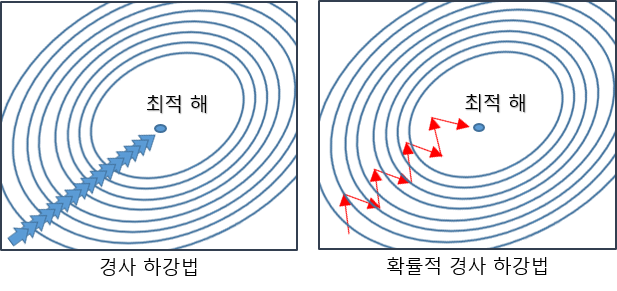

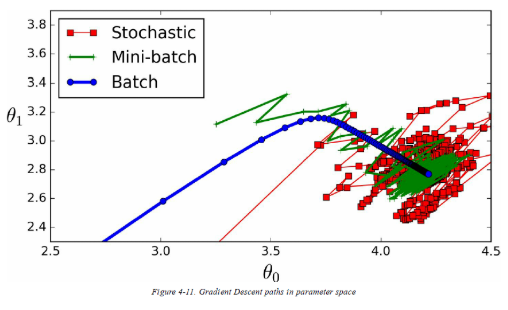

신경망 알고리즘이 확률적 경사 하강법을 사용하는 대표적인 방법, 보통 모델이 복잡하고 많은 데이터를 사용하기 때문에 모든 데이터를 한 번에 사용할 수 없어 SGD를 사용

### 손실 함수(loss function)
- 알고리즘의 정확성을 측정하는 도구
- 손실 함수의 값을 최소화시켜야 하지만, 어떤 값이 최소값인지 연역적으로 도출하는 것은 거의 불가능하기에 수많은 계산을 통해 적절한 값에서 끝마쳐야 함
- **비용 함수(cost function)** : 손실 함수는 샘플 하나에 대한 손실을 의미하나, 비용함수는 훈련 세트 전체 샘플에 대한 손실 함수의 합을 의미



### 로지스틱 손실 함수

- 분류 문제에서 손실을 클래스를 정확히 예측했으면 1, 못했으면 0으로 단순화하면 손실함수가 이산함수로 설정되어 경사 하강법을 사용할 수 없음
- 따라서 로지스틱 회귀를 이용하여 연속함수로 만들어야 함

$$ loss = target ×(-log(proba)) + (1-target) × (-log(1-proba)), \;target ∈ \{0,1\} $$
$$ cost = ∑loss $$


1. target=1이면 proba(예측확률)가 1에 가까울수록 loss 값은 줄어듬 ($-logx$)
2. target=0이면 proba(예측확률)가 0에 가까울수록 loss 값은 줄어듬 ($-log(1-x)$)

- 이진 분류 : 로지스틱 손실 함수
- 다중 분류 : 크로스 엔트로피 손실 함수
- 회귀 문제의 경우 평균 제곱 오차(MSE)를 사용

## SGDClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# Species 열을 제외한 나머지 5개는 input data로 사용
# Species 열은 target 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# train vs test 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# 이 둘은 numpy array

SGDClassifier의 객체를 만들 때 2개의 parameter를 지정
- loss : 손실함수의 종류 ('log'는 로지스틱 손실 함수)
- max_iter : 반복할 에포크의 횟수

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


다중분류일 경우 SGDClassifier에 loss='log'로 지정하면 클래스마다 이진 분류 모델을 만듦. 한 클래스를 양성 클래스로 놓고 나머지를 모두 음성 클래스로 두는 방법. 이런 방식을 **OvR(One versus Rest)**이라 함

- partial_fit() : 훈련한 모델을 epoch 1씩 추가로 훈련하는 메소드

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [ ]:
for i in range(10) :
  sc.partial_fit(train_scaled, train_target)
  print(sc.score(train_scaled, train_target))
  print(sc.score(test_scaled, test_target))

0.8487394957983193
0.85
0.8571428571428571
0.9
0.8487394957983193
0.9
0.865546218487395
0.9
0.8487394957983193
0.9
0.8571428571428571
0.9
0.8487394957983193
0.9
0.8487394957983193
0.9
0.8487394957983193
0.9
0.8739495798319328
0.9


SGDClassifier는 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법을 수행

### 에포크와 과대/과소적합

SGD는 Epoch 횟수에 따라 과소적합 or 과대적합 가능
- Epoch 횟수가 적으면 모델이 훈련 세트를 덜 학습하여 (비용함수를 최소화시키지 못하는) 과소학습 발생
- 반대로 Epoch 횟수가 많으면 test score가 떨어지면서 과대적합 발생
- **최적 Epoch**를 찾기 위해 먼저 넓은 범위의 Epoch 반복을 실시하고 이들 중 train score와 test score 차이가 극소화되는 Epoch 구간을 선별해야 함

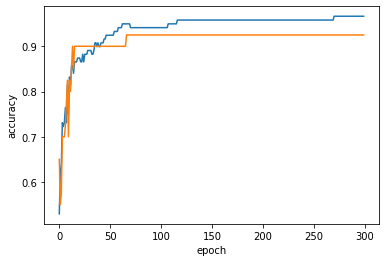

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
# Epoch별 train score와 test score를 저장하기 위해 비어 있는 list 생성
train_score = []
test_score = []
# fit 없이 partial_fit만을 사용하려면 train set에 있는 전체 class의 label을 이 메소드에 전달해주어야 하며 이를 위해 target의 종류를 classes에 array로 저장
# 처음부터 하나씩 꺼내면 전체 target 종류를 알 수 없으니 당연한 조치
classes = np.unique(train_target)

# 300번의 epoch 실행
for _ in range(300) : # 굳이 _를 사용하는 것은 버리는 값을 넣어두는 용도로 사용하기 위함
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


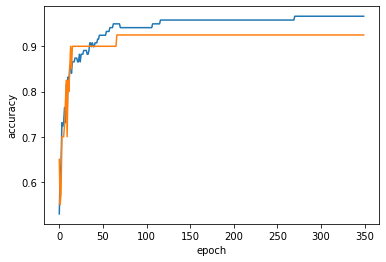

In [ ]:
# 50번의 epoch 실행
for _ in range(50) : # 굳이 _를 사용하는 것은 버리는 값을 넣어두는 용도로 사용하기 위함
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


**tol**은 SGDClassifier가 더이상 정확도를 향상시키지 못하여 자동으로 Epoch를 멈추는 임계점, 만약 None으로 설정하면 자동으로 멈추지 않고 무조건 100번까지 반복

In [ ]:
# 100번의 epoch 실행
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925
